Scrape film info from Wikipedia page

In [422]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

film_url = "https://en.wikipedia.org/wiki/Toy_Story_3"

r = requests.get(film_url)
soup = bs(r.content, 'html.parser', from_encoding="iso-8859-1")
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Toy Story 3 - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"21389548-fd0a-40a9-8fb9-66e0fb97b3e8","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Toy_Story_3","wgTitle":"Toy Story 3","wgCurRevisionId":1019518915,"wgRevisionId":1019518915,"wgArticleId":1213838,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles with dead external links","Articles with dead external links from February 2021","Articles with short description","Short description matches 

### Extract info box
The informations on the film are in a **table** whose class name is *infobox vevent*. The table contains rows ```<tr>``` which in turn contain *headers* ```<th>```, *data* ```<td``` or both. In particular the first two rows are the *Title* and the *Image* of the film.; the row corresponding to the former contains only the header and the one corresponding to the latter only the data. All the other rows contains both header and data

In [423]:
info_box = soup.find(class_="infobox vevent")
info_box_rows = info_box.find_all("tr")

info = {}
info["Title"] = info_box_rows[0].text
info["Image"] = '' if (x:=info_box_rows[1].img['src']).startswith('https:') else 'https:' + x # use walruse operator to store cover_url

for row in info_box_rows[2:]:
    info[row.find('th').text] = row.find('td').text

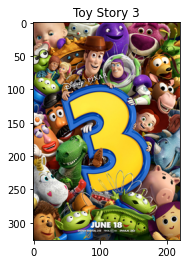

In [424]:
import matplotlib.pyplot as plt
from PIL import Image
im = Image.open(requests.get(info['Image'], stream=True).raw)
plt.title(info['Title'])
plt.imshow(im)

Doing in this manner the info can be gathered however fields whith multiple values are stored as a single string

In [430]:
import re

def get_row_info(row):
    key = row.find('th').get_text(" ", strip=True)
    val = row.find('td')
    val = [re.sub('\[\d+\]', "", x.replace('\xa0', ' ')) for x in val.get_text().split('\n') if x != '' ]
    
    
    return key, val if len(val) > 1 else val[0]

In [431]:
info = {}
info["Title"] = info_box_rows[0].text
info["Image"] = '' if (x:=info_box_rows[1].img['src']).startswith('https:') else 'https:' + x # use walruse operator to store cover_url

for row in info_box_rows[2:]:
    key, val = get_row_info(row)
    info[key] = val
    
print(f"Directed by: {info['Directed by']}")
print(f"Starring: {info['Starring']}")

Directed by: Lee Unkrich
Starring: ['Tom Hanks', 'Tim Allen', 'Joan Cusack', 'Don Rickles', 'Wallace Shawn', 'John Ratzenberger', 'Estelle Harris', 'Ned Beatty', 'Michael Keaton', 'Jodi Benson', 'John Morris']


In [415]:
info

{'Title': 'Toy Story 3',
 'Cover': 'https://upload.wikimedia.org/wikipedia/en/6/69/Toy_Story_3_poster.jpg',
 'Directed by': 'Lee Unkrich',
 'Produced by': 'Darla K. Anderson',
 'Screenplay by': 'Michael Arndt',
 'Story by': ['John Lasseter', 'Andrew Stanton', 'Lee Unkrich'],
 'Starring': ['Tom Hanks',
  'Tim Allen',
  'Joan Cusack',
  'Don Rickles',
  'Wallace Shawn',
  'John Ratzenberger',
  'Estelle Harris',
  'Ned Beatty',
  'Michael Keaton',
  'Jodi Benson',
  'John Morris'],
 'Music by': 'Randy Newman',
 'Cinematography': ['Jeremy Lasky', 'Kim White'],
 'Edited by': 'Ken Schretzmann',
 'Productioncompanies ': '\nWalt Disney Pictures\nPixar Animation Studios\n',
 'Distributed by': 'Walt Disney StudiosMotion Pictures',
 'Release date': 'a',
 'Running time': '103 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$200 million',
 'Box office': '$1.067 billion',
 'Production companies': ['Walt Disney Pictures', 'Pixar Animation Studios']}

In [491]:
class WikiFilmInfo():
    def __init__(self, url):
        r = requests.get(url)
        soup = bs(r.content, 'html.parser', from_encoding="iso-8859-1")
        info_box = soup.find(class_="infobox vevent")
        
        self.extract_info(info_box)
        
    def extract_info(self, info_box):
        info_box_rows = info_box.find_all("tr")
        
        self.info = {}
        self.info["Title"] = info_box_rows[0].text
        self.info["Image"] = '' if (x:=info_box_rows[1].img['src']).startswith('https:') else 'https:' + x # use walruse operator to store cover_url
        

        
        for row in info_box_rows[2:]:
            key, val = self.get_row_info(row)
            
            if key is not None and val is not None:
                self.info[key] = val
            

    def get_row_info(self,row):
        key = row.find('th').get_text(" ", strip=True)
        val = row.find('td')
        
        if val:
            val = [re.sub('\[\d+\]', "", x.replace('\xa0', ' ')) for x in val.get_text().split('\n') if x != '' ]
        
        return key, val if val is not None and len(val) > 1 else val[0]

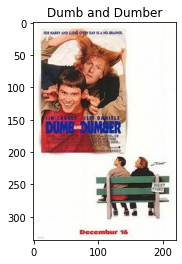

Peter Farrelly, December 16, 1994 (1994-12-16)


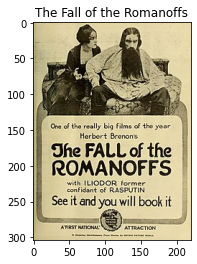

Herbert Brenon, Premiere (New York City) September 23, 1917; generally January 1918


In [486]:
film_urls = ["https://en.wikipedia.org/wiki/Dumb_and_Dumber","https://en.wikipedia.org/wiki/The_Fall_of_the_Romanoffs"]

for url in film_urls:
    wiki = WikiFilmInfo(url)

    im = Image.open(requests.get(wiki.info['Image'], stream=True).raw)
    plt.title(wiki.info['Title'])
    plt.imshow(im)
    plt.show()
    
    print(f"{wiki.info['Directed by']}, {wiki.info['Release date']}")

## Project 2: Saving info for all Disney movies


In [492]:
import time

disney_movies_url = "https://en.wikipedia.org/wiki/List_of_Walt_Disney_Pictures_films"
r = requests.get(disney_movies_url)
soup = bs(r.content)

In [493]:
soup.select(".wikitable.sortable i")

[<i><a href="/wiki/Academy_Award_Review_of_Walt_Disney_Cartoons" title="Academy Award Review of Walt Disney Cartoons">Academy Award Review of Walt Disney Cartoons</a></i>,
 <i><a href="/wiki/Snow_White_and_the_Seven_Dwarfs_(1937_film)" title="Snow White and the Seven Dwarfs (1937 film)">Snow White and the Seven Dwarfs</a></i>,
 <i><a href="/wiki/Pinocchio_(1940_film)" title="Pinocchio (1940 film)">Pinocchio</a></i>,
 <i><a href="/wiki/Fantasia_(1940_film)" title="Fantasia (1940 film)">Fantasia</a></i>,
 <i><a href="/wiki/The_Reluctant_Dragon_(1941_film)" title="The Reluctant Dragon (1941 film)">The Reluctant Dragon</a></i>,
 <i><a href="/wiki/Dumbo" title="Dumbo">Dumbo</a></i>,
 <i><a href="/wiki/Bambi" title="Bambi">Bambi</a></i>,
 <i><a href="/wiki/Saludos_Amigos" title="Saludos Amigos">Saludos Amigos</a></i>,
 <i><a href="/wiki/Victory_Through_Air_Power_(film)" title="Victory Through Air Power (film)">Victory Through Air Power</a></i>,
 <i><a href="/wiki/The_Three_Caballeros" title=

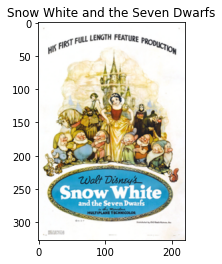

['David Hand (supervising)', 'William Cottrell', 'Wilfred Jackson', 'Larry Morey', 'Perce Pearce', 'Ben Sharpsteen'], December 21, 1937 (1937-12-21) (Carthay Circle Theatre, Los Angeles, CA, premiere)


Supervising DirectorsBen SharpsteenHamilton LuskeSequence DirectorsBill RobertsNorman FergusonJack KinneyWilfred JacksonT. Hee, ['February 7, 1940 (1940-02-07) (Center Theatre)', 'February 23, 1940 (1940-02-23) (United States)']


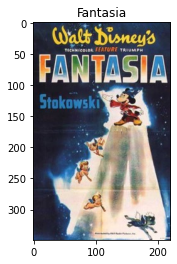

['Samuel Armstrong', 'James Algar', 'Bill Roberts', 'Paul Satterfield', 'Ben Sharpsteen', 'David D. Hand', 'Hamilton Luske', 'Jim Handley', 'Ford Beebe', 'T. Hee', 'Norman Ferguson', 'Wilfred Jackson'], November 13, 1940 (1940-11-13)


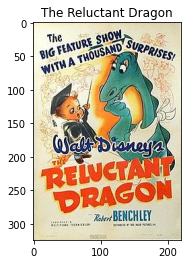

Alfred Werker (live action)Hamilton Luske (animation)Jack Cutting, Ub Iwerks, Jack Kinney (sequence directors), June 27, 1941 (1941-06-27)


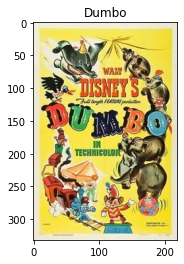

Ben Sharpsteen (supervising director)Norman FergusonWilfred JacksonBill RobertsJack KinneySamuel Armstrong, ['October 23, 1941 (1941-10-23) (New York City)', 'October 31, 1941 (1941-10-31) (U.S.)']


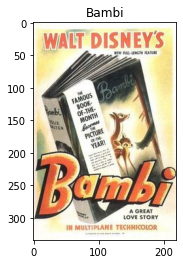

Supervising directorDavid HandSequence directorsJames AlgarSamuel ArmstrongGraham HeidBill RobertsPaul SatterfieldNorman Wright, ['August 9, 1942 (1942-08-09) (World Premiere-London)', 'August 13, 1942 (1942-08-13) (Premiere-New York City)', 'August 21, 1942 (1942-08-21) (U.S.)']


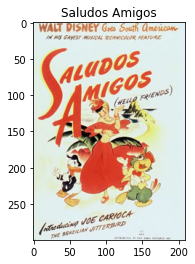

['Norman Ferguson', 'Wilfred Jackson', 'Jack Kinney', 'Hamilton Luske', 'Bill Roberts'], ['August 24, 1942 (1942-08-24) (World Premiere-Rio de Janeiro)', 'February 6, 1943 (1943-02-06) (U.S. Premiere-Boston)', 'February 19, 1943 (1943-02-19) (U.S.)']


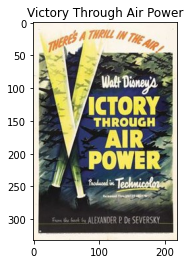

 Animated sequences: James Algar  Clyde Geronimi  Jack Kinney  de Seversky scenes:  H.C. Potter, July 17, 1943 (1943-07-17)


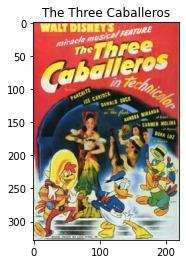

['Norman Ferguson (supervising director)', 'Clyde Geronimi', 'Jack Kinney', 'Bill Roberts', 'Harold Young (sequence directors)'], ['December 21, 1944 (1944-12-21) (Mexico City)', 'February 3, 1945 (1945-02-03) (US)']


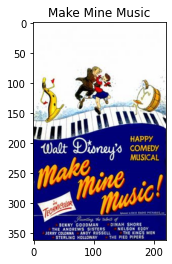

['Jack Kinney', 'Clyde Geronimi', 'Hamilton Luske', 'Joshua Meador', 'Robert Cormack'], ['April 20, 1946 (1946-04-20) (New York City premiere)', 'August 15, 1946 (1946-08-15) (U.S.)']


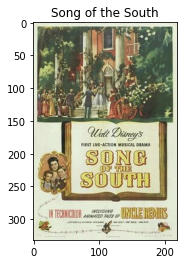

['Live action:', 'Harve Foster', 'Animation:', 'Wilfred Jackson'], ['November 12, 1946 (1946-11-12) (Premiere: Atlanta, Georgia)', 'November 20, 1946 (1946-11-20)', 'March 30, 1947 (1947-03-30) (Stanford Theatre, Palo Alto, California)']


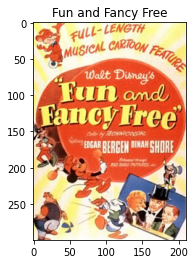

['Jack Kinney (animation)', 'Bill Roberts (animation)', 'Hamilton Luske (animation)', 'William Morgan (live-action)'], September 27, 1947 (1947-09-27)


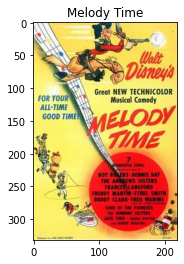

Jack KinneyClyde GeronimiHamilton LuskeWilfred Jackson, May 27, 1948 (1948-05-27)


Harold D. SchusterHamilton Luske, November 29, 1948 (Chicago, Illinois)January 19, 1949 (Indianapolis, Indiana)


['Jack Kinney', 'Clyde Geronimi', 'James Algar', 'Ben Sharpsteen (production supervisor)'], October 5, 1949 (1949-10-05)


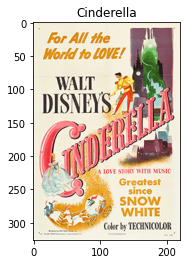

['Clyde Geronimi', 'Hamilton Luske', 'Wilfred Jackson', 'Ben Sharpsteen (production supervisor)'], ['February 22, 1950 (1950-02-22) (Boston)', 'March 4, 1950 (1950-03-04) (United States)']


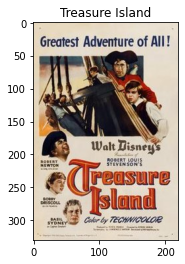

Byron Haskin, ['June 22, 1950 (1950-06-22) (World Premiere-London)', 'July 29, 1950 (1950-07-29) (US)']


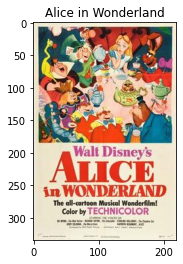

['Clyde Geronimi', 'Wilfred Jackson', 'Hamilton Luske'], ['July 26, 1951 (1951-07-26) (London, premiere)', 'July 28, 1951 (1951-07-28) (New York City, premiere)']


Ken Annakin, ['March 13, 1952 (1952-03-13) (Premiere-London)', 'June 26, 1952 (1952-06-26) (US)']


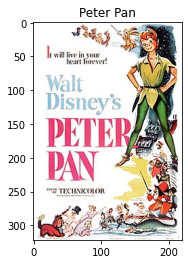

['Clyde Geronimi', 'Wilfred Jackson', 'Hamilton Luske'], February 5, 1953 (1953-02-05) (United States)


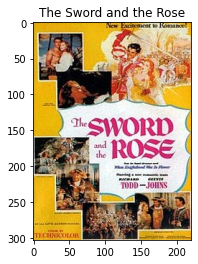

Ken Annakin, August 8, 1953 (1953-08-08) (US)


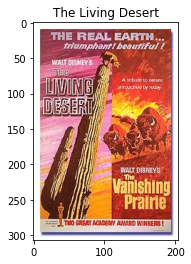

James Algar, November 10, 1953


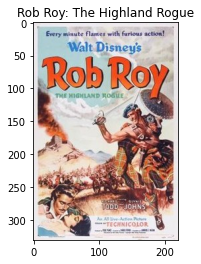

Harold French, ['26 October 1953 (1953-10-26) (Premiere-London)', '4 February 1954 (1954-02-04) (US)']


James Algar, August 17, 1954 (1954-08-17)


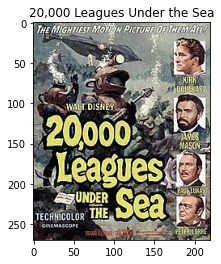

Richard Fleischer, December 23, 1954 (1954-12-23)


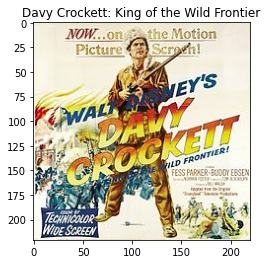

Norman Foster, May 25, 1955 (1955-05-25)


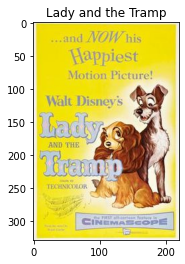

['Clyde Geronimi', 'Wilfred Jackson', 'Hamilton Luske'], June 22, 1955 (1955-06-22)


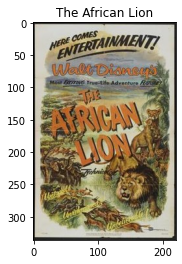

James Algar, September 14, 1955 (1955-09-14)


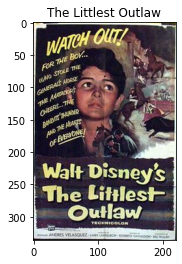

Roberto GavaldÃ³n, December 22, 1955 (1955-12-22)


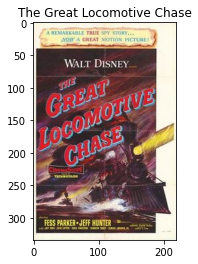

Francis D. Lyon, June 8, 1956


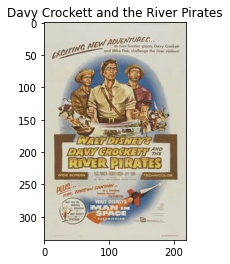

Norman Foster, July 18, 1956 (1956-07-18)


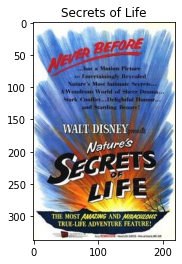

James Algar, September 4, 1956 (1956-09-04)


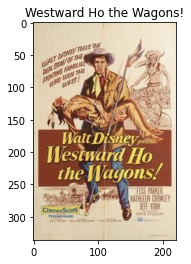

William Beaudine, December 20, 1956 (1956-12-20)


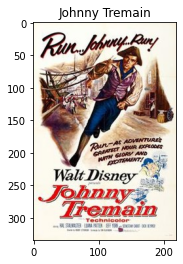

Robert Stevenson, June 19, 1957 (1957-06-19)


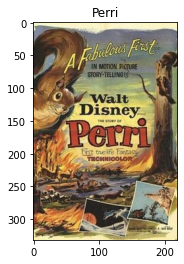

N. Paul KenworthyRalph Wright, August 28, 1957 (1957-08-28)


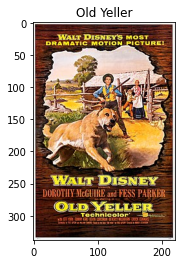

Robert Stevenson, December 25, 1957 (1957-12-25)


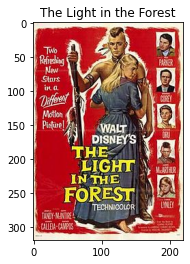

Herschel Daugherty, July 8, 1958 (1958-07-08)


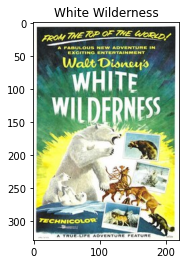

James Algar, August 12, 1958 (1958-08-12)


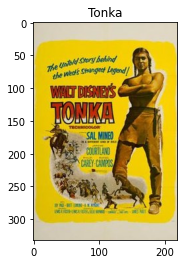

Lewis R. Foster, December 25, 1958 (1958-12-25)


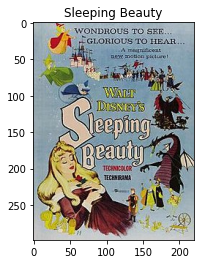

['Clyde Geronimi (supervising)', 'Eric Larson', 'Wolfgang Reitherman', 'Les Clark'], ['January 29, 1959 (1959-01-29)', '']


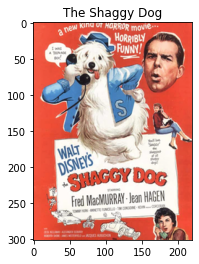

Charles Barton, March 19, 1959 (1959-03-19)


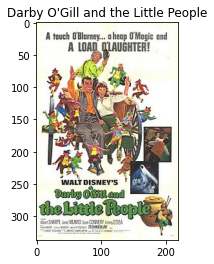

Robert Stevenson, ['June 24, 1959 (1959-06-24) (Dublin)', 'June 26, 1959 (1959-06-26) (Los Angeles)']


TypeError: 'NoneType' object is not subscriptable

In [494]:
tables = soup.find_all('table', class_="wikitable sortable")

for table in tables[4:]:
    for row in soup.select(".wikitable.sortable i"):
        url = 'https://en.wikipedia.org'+ row.a['href']
        wiki = WikiFilmInfo(url)

        try:
            im = Image.open(requests.get(wiki.info['Image'], stream=True).raw)
            plt.title(wiki.info['Title'])
            plt.imshow(im)
            plt.show()

            print(f"{wiki.info['Directed by']}, {wiki.info['Release date']}")
        except:
            pass

In [472]:

url = "https://en.wikipedia.org/wiki/Zorro_(1957_TV_series)#Theatrical"
r = requests.get(url)
soup = bs(r.content)

In [476]:
info_box = soup.find(class_="infobox vevent")
info_box_rows = info_box.find_all("tr")

info_box_rows[0]

<tr><th class="infobox-above summary" colspan="2" style="font-style: italic; background: #CCCCFF; padding: 0.25em 1em; line-height: 1.5em; line-height: normal;">Zorro</th></tr>

In [479]:
info["Title"] = info_box_rows[0].text
info["Image"] = '' if (x:=info_box_rows[1].img['src']).startswith('https:') else 'https:' + x # use walruse operator to store cover_url

for row in info_box_rows[2:]:
    info[row.find('th').text] = row.find('td').text
    
    print(row.find('td').text)


Action/Adventure
Comedy-drama
Western
Superhero

Johnston McCulley (original stories)

Guy Williams[1]
Gene Sheldon
Henry Calvin
George J. Lewis

United States
2
78 (+4 specials) (list of episodes)


AttributeError: 'NoneType' object has no attribute 'text'

In [478]:
info

{'Title': 'Zorro',
 'Image': 'https://upload.wikimedia.org/wikipedia/en/thumb/a/a1/Zorro_1957_show_logo.jpg/250px-Zorro_1957_show_logo.jpg',
 'Genre': '\nAction/Adventure\nComedy-drama\nWestern\nSuperhero\n',
 'Created by': 'Johnston McCulley (original stories)',
 'Starring': '\nGuy Williams[1]\nGene Sheldon\nHenry Calvin\nGeorge J. Lewis\n',
 'Country of origin': 'United States',
 'No. of seasons': '2',
 'No. of episodes': '78 (+4 specials) (list of episodes)'}